In [1]:
from UTILITY_quickstart import *

In [2]:
#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

In [3]:
csrTF = True

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0


In [4]:
eleNameList = tao.lat_ele_list()

#list(enumerate(eleNameList))
startIndex = 728
endIndex = 1294

selectIndices = np.arange(startIndex, endIndex, 1)

print(eleNameList[startIndex])
print(eleNameList[endIndex])

#eleNameList = eleNameList[startIndex:endIndex]

BEGL3F_1
BEGBC20


Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = CB1LE
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.4227766558659285 GeV
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = CB1LE
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.91548891008253 GeV
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = CB1LE
Tracking!
trackBeam() exiting


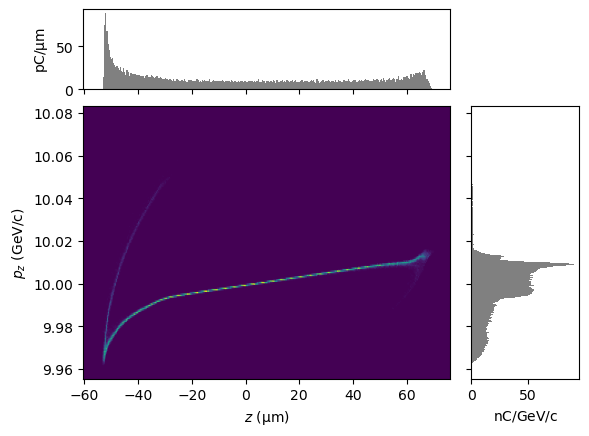

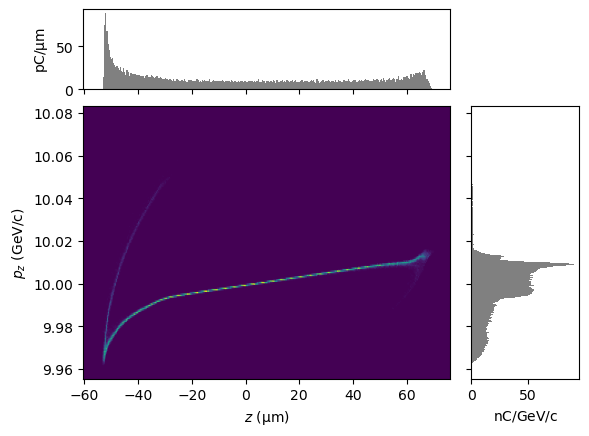

In [5]:
#Save beam data everywhere
#[tao.cmd(f"set beam add_saved_at = {ele}") for ele in eleNameList]
[tao.cmd(f"set beam add_saved_at = {i}") for i in selectIndices]

activeSettings = importedDefaultSettings | {"L2PhaseSet" : -33}

#Track
setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings, trackEnd = "CB1LE", verbose = True)

P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))


In [6]:
# for ele in eleNameList:
#     P = getBeamAtElement(tao, ele)
#     writeBeam(
#     P,
#     f"""/tmp/{ele}_{tao.ele_orbit(ele)['s']}.h5"""
#     )

for i in selectIndices:
    P = getBeamAtElement(tao, i)
    writeBeam(
    P,
    f"""/tmp/{tao.ele_orbit(i)['s']}.h5"""
    )

## Looking at simulated BLEN BC14

In [5]:
#Reload tao for fresh start
csrTF = True

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


In [7]:
for L2PhaseSet in np.arange(-40, -30, 0.2):
    activeSettings = importedDefaultSettings | {"L2PhaseSet" : L2PhaseSet}
    
    #Track
    setLattice(tao, **activeSettings)
    #trackBeam(tao, **activeSettings, trackEnd = "ENDBC14_2", verbose = True)
    trackBeam(tao, **activeSettings)
    
    P = getBeamAtElement(tao, "ENDBC14_2")
    BC14Length = smallestIntervalImpliedSigma(P.z)
    
    P = getBeamAtElement(tao, "PENT")
    PENTLength = smallestIntervalImpliedSigma(P.z)
    
    print(f"{L2PhaseSet}, {BC14Length}, {PENTLength}")

-40.0, 9.378145351184969e-05, 1.9959774558024788e-05
-39.8, 8.97857290339221e-05, 1.8230450442008515e-05
-39.599999999999994, 8.577989852719429e-05, 1.6507107160339738e-05
-39.39999999999999, 8.179628575696151e-05, 1.4849633952118727e-05
-39.19999999999999, 7.774479102055257e-05, 1.6070416364656295e-05
-38.999999999999986, 7.379426143487664e-05, 1.7533030575700994e-05
-38.79999999999998, 6.977696231365898e-05, 1.9048276074970283e-05
-38.59999999999998, 6.586705470168753e-05, 2.0381644819718806e-05
-38.39999999999998, 6.19650430971177e-05, 2.2267206601422512e-05
-38.199999999999974, 5.804034804657607e-05, 2.429752106994157e-05
-37.99999999999997, 5.4195315310462844e-05, 2.6480709165742796e-05
-37.79999999999997, 5.0361147848732885e-05, 2.8757813377441442e-05
-37.599999999999966, 4.6563748085549576e-05, 3.124579681478036e-05
-37.39999999999996, 4.2756807868229204e-05, 3.395208315660054e-05
-37.19999999999996, 3.900701641561678e-05, 3.673054337119355e-05
-36.99999999999996, 3.525688401264

In [11]:
#Reload tao for fresh start
csrTF = True

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0


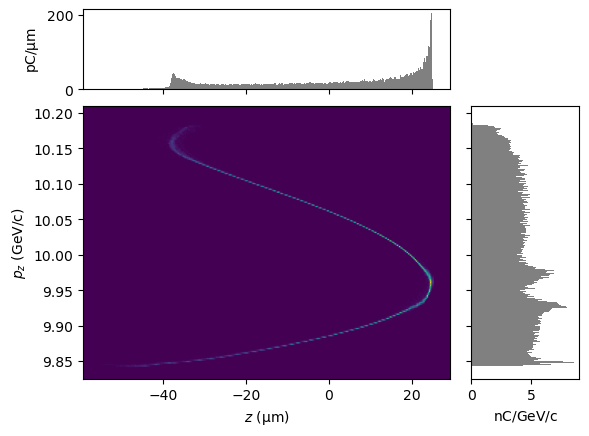

In [12]:
activeSettings = importedDefaultSettings | {"L2PhaseSet" : -39}

#Track
setLattice(tao, **activeSettings)
#trackBeam(tao, **activeSettings, trackEnd = "ENDBC14_2", verbose = True)
trackBeam(tao, **activeSettings)

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))

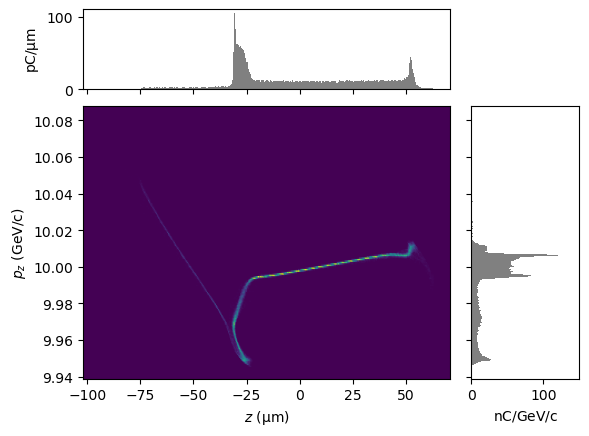

In [13]:
activeSettings = importedDefaultSettings | {"L2PhaseSet" : -33}

#Track
setLattice(tao, **activeSettings)
#trackBeam(tao, **activeSettings, trackEnd = "ENDBC14_2", verbose = True)
trackBeam(tao, **activeSettings)

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))

In [14]:
smallestIntervalImpliedSigma(P.z)

2.6205307921236104e-05